In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import keras

Using TensorFlow backend.


In [3]:
keras.backend.backend()

'tensorflow'

In [5]:
from keras.datasets import fashion_mnist

In [40]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

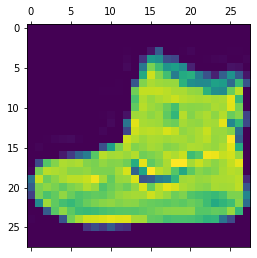

In [41]:
plt.matshow(X_train[0])

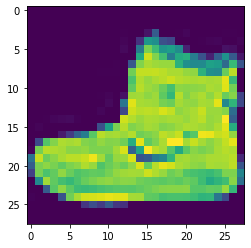

In [42]:
plt.imshow(X_train[0])

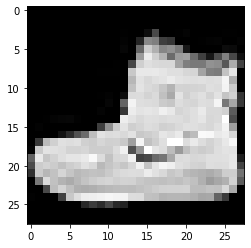

In [43]:
plt.imshow(X_train[0], cmap='gray')

In [44]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_train.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (60000,)


In [45]:
X_train[0] , y_train[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

# Perform Noramalization 

In [46]:
# for converting the values between 0 to 1
X_train = X_train / 255
X_test = X_test / 255

In [47]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Applying MOdel

In [48]:
from  keras.models import Sequential
from keras.layers import Dense, Activation , Flatten

In [49]:
model = Sequential()

model.add(Flatten(input_shape = [28,28]))
model.add(Dense(28, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 28)                21980     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                290       
Total params: 22,270
Trainable params: 22,270
Non-trainable params: 0
_________________________________________________________________


# Compile 

In [50]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [51]:
model.fit(X_train, y_train,
         validation_data=(X_test, y_test),
         batch_size=16,
         epochs=2,
         verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
 - 11s - loss: 0.5398 - accuracy: 0.8131 - val_loss: 0.4529 - val_accuracy: 0.8370
Epoch 2/2
 - 9s - loss: 0.4045 - accuracy: 0.8576 - val_loss: 0.4301 - val_accuracy: 0.8500


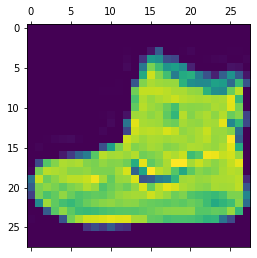

In [52]:
plt.matshow(X_train[0])

In [58]:
pred_y = model.predict(X_test)
pred_y.shape

(10000, 10)